<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Processed Data</h4>
    <p style="font-size: 20px;">NBA API Seasons 2021-22 to 2023-24</p>
</div>

<a name="EDAp"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Team Level Data](#1.-Team-Level-Data)**

- [1.1. Rolling Average Box Scores](#1.1.-Rolling-Average-Box-Scores)

# Setup

[Return to top](#EDAp)

In [2]:
import sys
from pathlib import Path
# get current working directory
cwd = %pwd
# add shared_code directory to Python sys.path
sys.path.append(str(Path(cwd).parent / "shared_code"))
# import all libraries in shared_code directory 'imports.py' file
from imports import *
%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Data

[Return to top](#EDAp)

In [3]:
team_bs_matchups_roll_df = pd.read_csv('../../data/processed/nba_team_matchups_rolling_box_scores_2022_2024_r05.csv')

# convert 'GAME_DATE' column to datetime
team_bs_matchups_roll_df['GAME_DATE'] = pd.to_datetime(team_bs_matchups_roll_df['GAME_DATE'])

In [4]:
team_bs_matchups_roll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GAME_ID            3172 non-null   int64         
 1   GAME_RESULT        3172 non-null   int64         
 2   TOTAL_PTS          3172 non-null   int64         
 3   PLUS_MINUS         3172 non-null   float64       
 4   HOME_TEAM_NAME     3172 non-null   object        
 5   SEASON_ID          3172 non-null   object        
 6   GAME_DATE          3172 non-null   datetime64[ns]
 7   ROLL_HOME_PTS      3082 non-null   float64       
 8   ROLL_HOME_FGM      3082 non-null   float64       
 9   ROLL_HOME_FGA      3082 non-null   float64       
 10  ROLL_HOME_FG_PCT   3082 non-null   float64       
 11  ROLL_HOME_FG3M     3082 non-null   float64       
 12  ROLL_HOME_FG3A     3082 non-null   float64       
 13  ROLL_HOME_FG3_PCT  3082 non-null   float64       
 14  ROLL_HOM

In [5]:
team_bs_matchups_roll_df.head()

,GAME_ID,GAME_RESULT,TOTAL_PTS,PLUS_MINUS,HOME_TEAM_NAME,SEASON_ID,GAME_DATE,ROLL_HOME_PTS,ROLL_HOME_FGM,ROLL_HOME_FGA,ROLL_HOME_FG_PCT,ROLL_HOME_FG3M,ROLL_HOME_FG3A,ROLL_HOME_FG3_PCT,ROLL_HOME_FTM,ROLL_HOME_FTA,ROLL_HOME_FT_PCT,ROLL_HOME_OREB,ROLL_HOME_DREB,ROLL_HOME_REB,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,AWAY_TEAM_NAME,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF
0,22100002,0,235,-7.0,Los Angeles Lakers,2021-22,2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden State Warriors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22100001,1,231,23.0,Milwaukee Bucks,2021-22,2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22100007,1,253,11.0,Memphis Grizzlies,2021-22,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland Cavaliers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22100008,1,230,18.0,Minnesota Timberwolves,2021-22,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston Rockets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22100009,0,214,-20.0,New Orleans Pelicans,2021-22,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philadelphia 76ers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
team_bs_matchups_roll_df.describe()

,GAME_ID,GAME_RESULT,TOTAL_PTS,PLUS_MINUS,GAME_DATE,ROLL_HOME_PTS,ROLL_HOME_FGM,ROLL_HOME_FGA,ROLL_HOME_FG_PCT,ROLL_HOME_FG3M,ROLL_HOME_FG3A,ROLL_HOME_FG3_PCT,ROLL_HOME_FTM,ROLL_HOME_FTA,ROLL_HOME_FT_PCT,ROLL_HOME_OREB,ROLL_HOME_DREB,ROLL_HOME_REB,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF
count,3.172e+03,3172.000,3172.000,3172.000,3172,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000
mean,2.220e+07,0.561,226.680,2.103,2022-11-10 04:52:48.726355456,114.112,41.784,88.512,0.473,12.634,34.949,0.361,17.909,22.927,0.781,10.511,33.842,44.353,25.543,7.494,4.928,13.180,19.736,111.938,41.081,88.437,0.465,12.263,34.567,0.354,17.513,22.536,0.778,10.434,33.161,43.596,24.814,7.463,4.718,13.398,19.969
min,2.210e+07,0.000,169.000,-56.000,2021-10-19 00:00:00,83.000,30.000,75.800,0.309,5.000,22.000,0.172,5.000,8.000,0.438,4.000,22.000,29.000,14.000,3.200,0.000,6.400,13.800,82.000,30.000,75.000,0.333,5.000,22.000,0.172,5.000,9.000,0.529,4.000,20.000,29.000,14.000,2.000,0.000,7.000,11.000
25%,2.210e+07,0.000,213.000,-8.000,2022-02-06 00:00:00,109.000,39.800,85.800,0.452,11.000,31.600,0.334,15.800,20.400,0.745,9.000,32.000,41.800,23.400,6.400,4.000,11.800,18.400,107.000,39.000,85.600,0.446,10.600,31.200,0.326,15.600,20.200,0.743,9.000,31.200,41.200,22.800,6.400,3.800,12.000,18.400
50%,2.220e+07,1.000,226.000,3.000,2022-12-07 00:00:00,114.400,41.800,88.200,0.474,12.500,34.600,0.361,17.800,22.800,0.784,10.400,33.800,44.200,25.400,7.400,4.800,13.000,19.800,112.000,41.000,88.200,0.465,12.000,34.200,0.353,17.400,22.400,0.782,10.200,33.000,43.400,24.600,7.400,4.600,13.200,19.800
75%,2.220e+07,1.000,240.000,11.000,2023-04-02 00:00:00,119.200,43.800,91.000,0.494,14.000,38.000,0.390,20.000,25.400,0.818,11.800,35.600,46.600,27.600,8.400,5.800,14.600,21.000,116.729,43.000,91.000,0.485,13.667,37.787,0.381,19.400,25.000,0.815,11.800,35.000,45.800,26.800,8.400,5.600,14.788,21.400
max,6.230e+07,1.000,351.000,73.000,2024-02-04 00:00:00,143.000,56.000,108.000,0.584,20.600,50.000,0.526,35.000,40.000,1.000,20.200,49.000,64.000,38.000,18.000,17.000,25.000,29.000,138.600,52.200,117.000,0.570,24.000,57.000,0.548,32.000,44.000,1.000,21.000,48.000,62.000,39.000,16.000,13.000,30.000,30.000
std,7.164e+05,0.496,20.357,14.672,NaN,7.462,3.003,4.001,0.031,2.258,4.520,0.043,3.277,3.838,0.055,2.175,2.953,3.698,3.100,1.544,1.413,2.035,2.081,7.173,2.949,4.066,0.030,2.239,4.532,0.041,2.980,3.620,0.055,2.263,2.981,3.660,2.991,1.546,1.373,2.153,2.290


<a name="1.-Team-Level-Data"></a>
# 1. Team Level Data

[Return to top](#EDAp)

<a name="1.1.-Rolling-Average-Box-Scores"></a>
## 1.1. Rolling Average Box Scores

[Return to top](#EDAp)

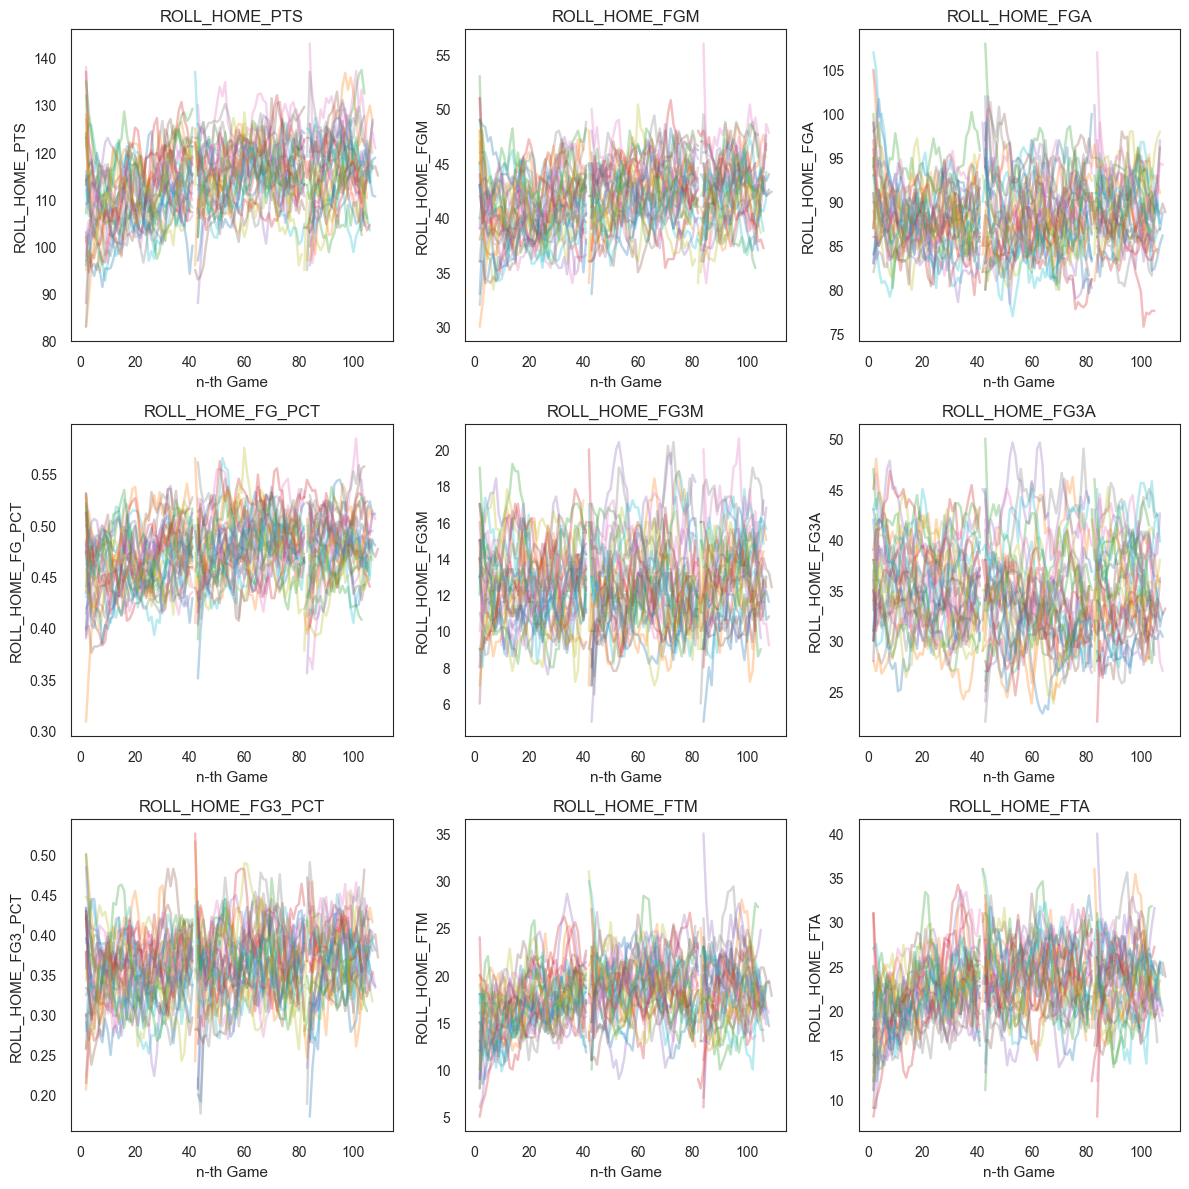

In [7]:
# plot for Home Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'HOME_TEAM_NAME', 'ROLL_HOME_')

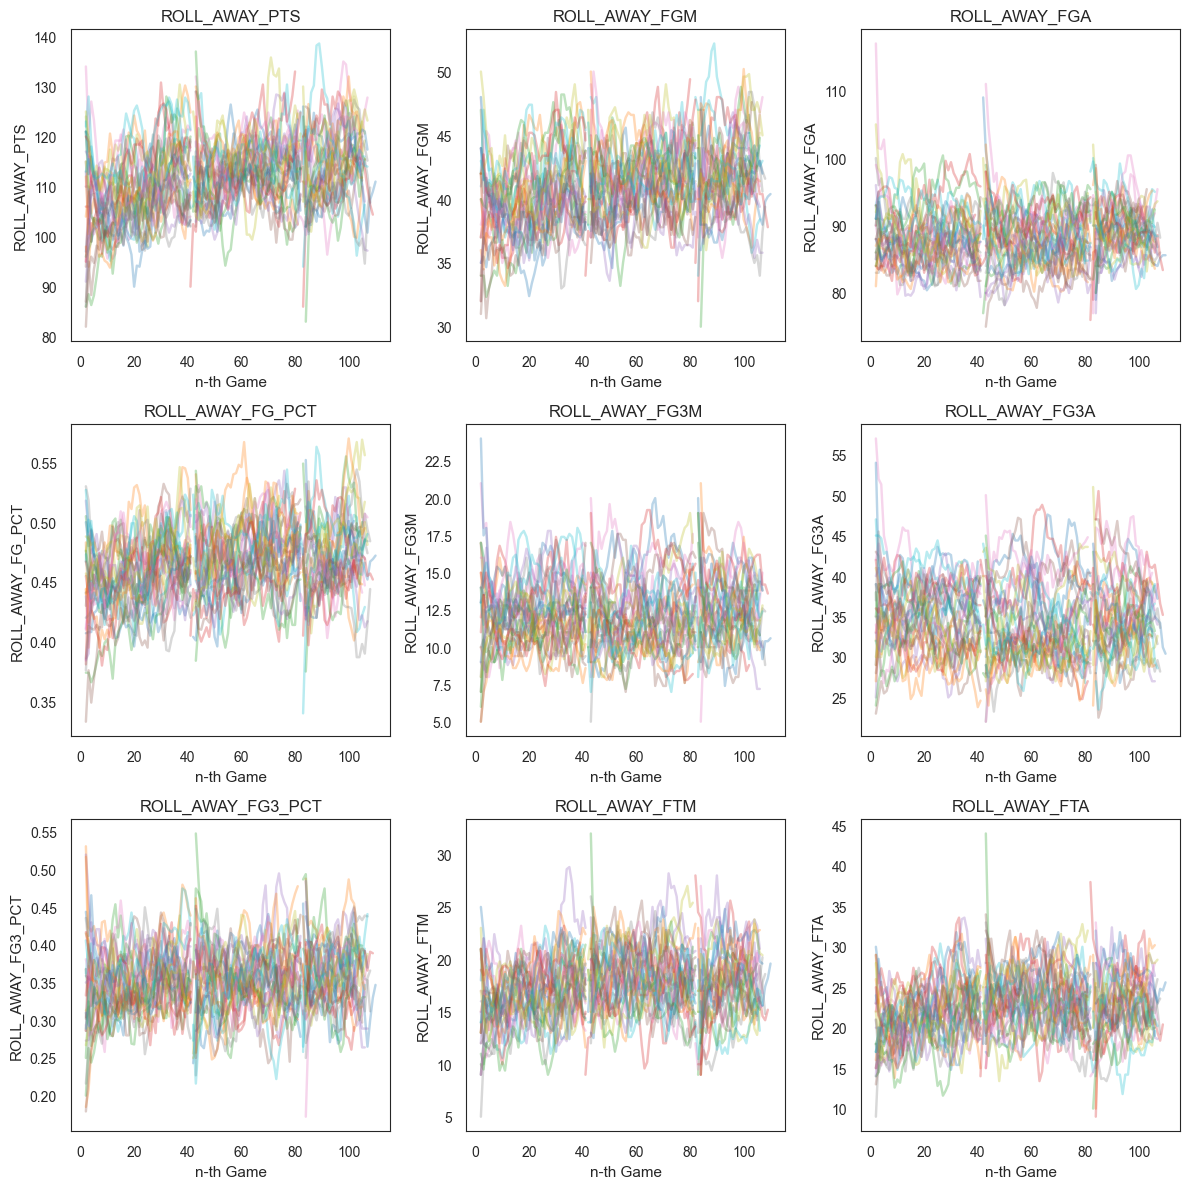

In [8]:
# plot for Away Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'AWAY_TEAM_NAME', 'ROLL_AWAY_')

In [15]:
cols = team_bs_matchups_roll_df.columns
cols

Index(['GAME_ID', 'GAME_RESULT', 'TOTAL_PTS', 'PLUS_MINUS', 'HOME_TEAM_NAME',
       'SEASON_ID', 'GAME_DATE', 'ROLL_HOME_PTS', 'ROLL_HOME_FGM',
       'ROLL_HOME_FGA', 'ROLL_HOME_FG_PCT', 'ROLL_HOME_FG3M', 'ROLL_HOME_FG3A',
       'ROLL_HOME_FG3_PCT', 'ROLL_HOME_FTM', 'ROLL_HOME_FTA',
       'ROLL_HOME_FT_PCT', 'ROLL_HOME_OREB', 'ROLL_HOME_DREB', 'ROLL_HOME_REB',
       'ROLL_HOME_AST', 'ROLL_HOME_STL', 'ROLL_HOME_BLK', 'ROLL_HOME_TOV',
       'ROLL_HOME_PF', 'AWAY_TEAM_NAME', 'ROLL_AWAY_PTS', 'ROLL_AWAY_FGM',
       'ROLL_AWAY_FGA', 'ROLL_AWAY_FG_PCT', 'ROLL_AWAY_FG3M', 'ROLL_AWAY_FG3A',
       'ROLL_AWAY_FG3_PCT', 'ROLL_AWAY_FTM', 'ROLL_AWAY_FTA',
       'ROLL_AWAY_FT_PCT', 'ROLL_AWAY_OREB', 'ROLL_AWAY_DREB', 'ROLL_AWAY_REB',
       'ROLL_AWAY_AST', 'ROLL_AWAY_STL', 'ROLL_AWAY_BLK', 'ROLL_AWAY_TOV',
       'ROLL_AWAY_PF', 'nth_game'],
      dtype='object')

In [13]:
res_cols = ['GAME_RESULT', 'TOTAL_PTS', 'PLUS_MINUS']
home_cols = ['ROLL_HOME_PTS', 'ROLL_HOME_FGM', 'ROLL_HOME_FGA', 
            'ROLL_HOME_FG_PCT', 'ROLL_HOME_FG3M', 'ROLL_HOME_FG3A',
            'ROLL_HOME_FG3_PCT', 'ROLL_HOME_FTM', 'ROLL_HOME_FTA',
            'ROLL_HOME_FT_PCT', 'ROLL_HOME_OREB', 'ROLL_HOME_DREB',
            'ROLL_HOME_REB','ROLL_HOME_AST', 'ROLL_HOME_STL', 
            'ROLL_HOME_BLK', 'ROLL_HOME_TOV','ROLL_HOME_PF']
away_cols = ['ROLL_AWAY_PTS', 'ROLL_AWAY_FGM', 'ROLL_AWAY_FGA',
             'ROLL_AWAY_FG_PCT', 'ROLL_AWAY_FG3M', 'ROLL_AWAY_FG3A', 
             'ROLL_AWAY_FG3_PCT', 'ROLL_AWAY_FTM', 'ROLL_AWAY_FTA', 
             'ROLL_AWAY_FT_PCT', 'ROLL_AWAY_OREB','ROLL_AWAY_DREB',
             'ROLL_AWAY_REB', 'ROLL_AWAY_AST', 'ROLL_AWAY_STL',
             'ROLL_AWAY_BLK', 'ROLL_AWAY_TOV', 'ROLL_AWAY_PF',]

In [45]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon


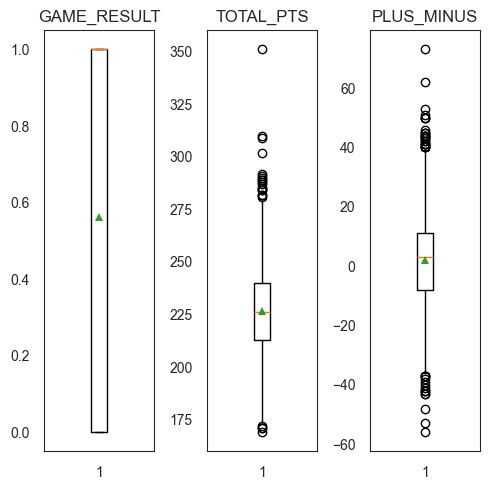

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(5, 5))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot(team_bs_matchups_roll_df[res_cols[i]],
               showmeans = True) 
    ax.set_title(res_cols[i])

plt.tight_layout()
plt.show()


In [101]:
filtered_df = team_bs_matchups_roll_df.dropna(how='any')

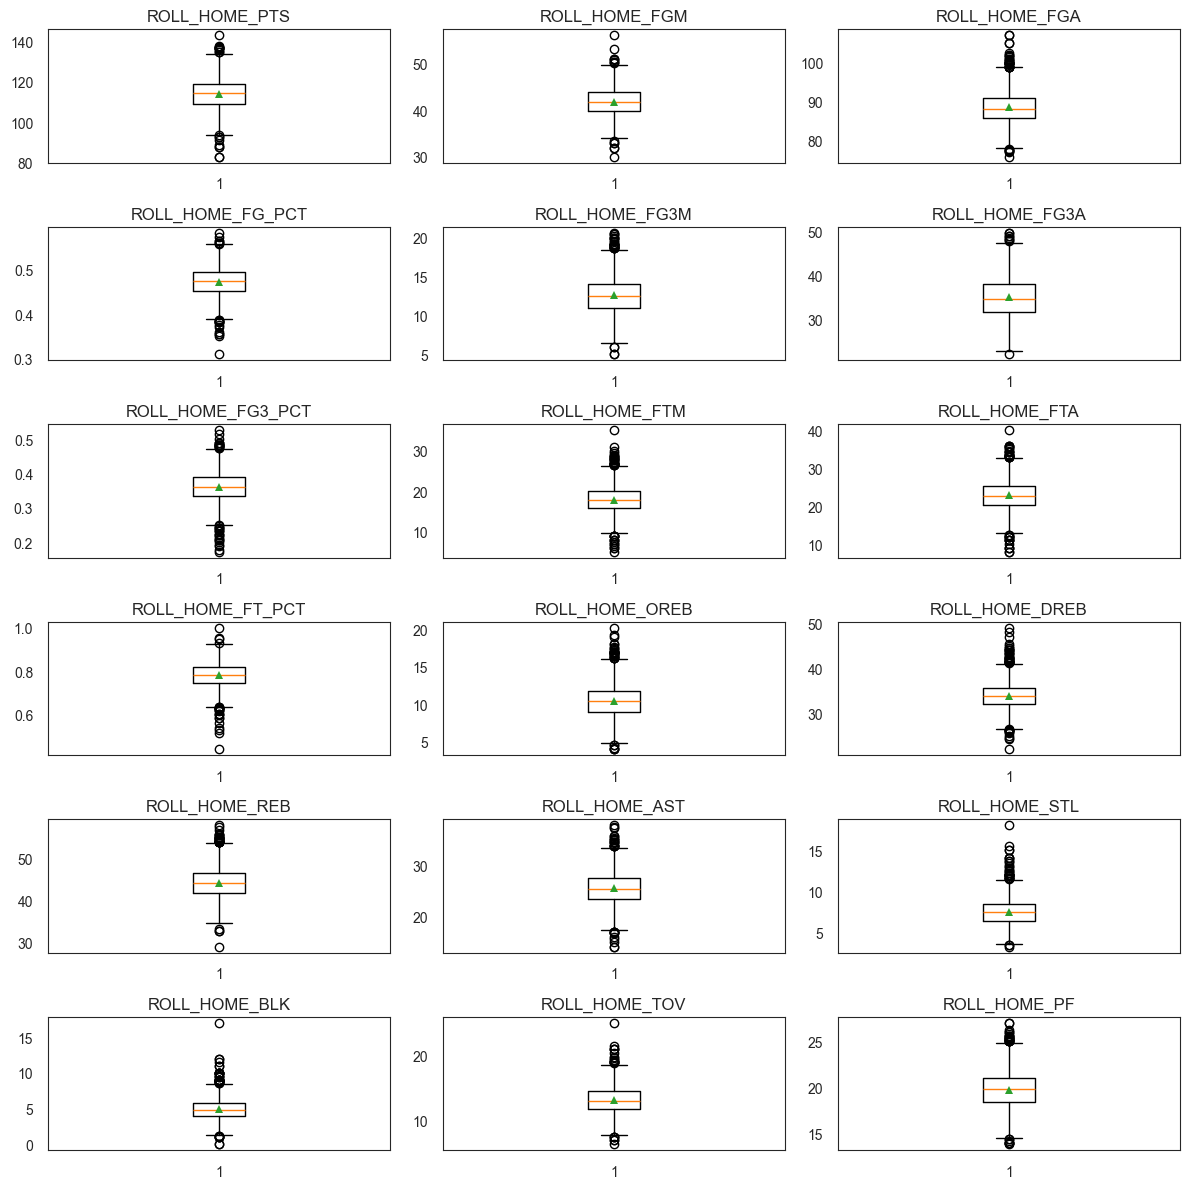

In [103]:
fig, axs = plt.subplots(6, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot(filtered_df[home_cols[i]],
               showmeans = True) 
    ax.set_title(home_cols[i])

plt.tight_layout()
plt.show()

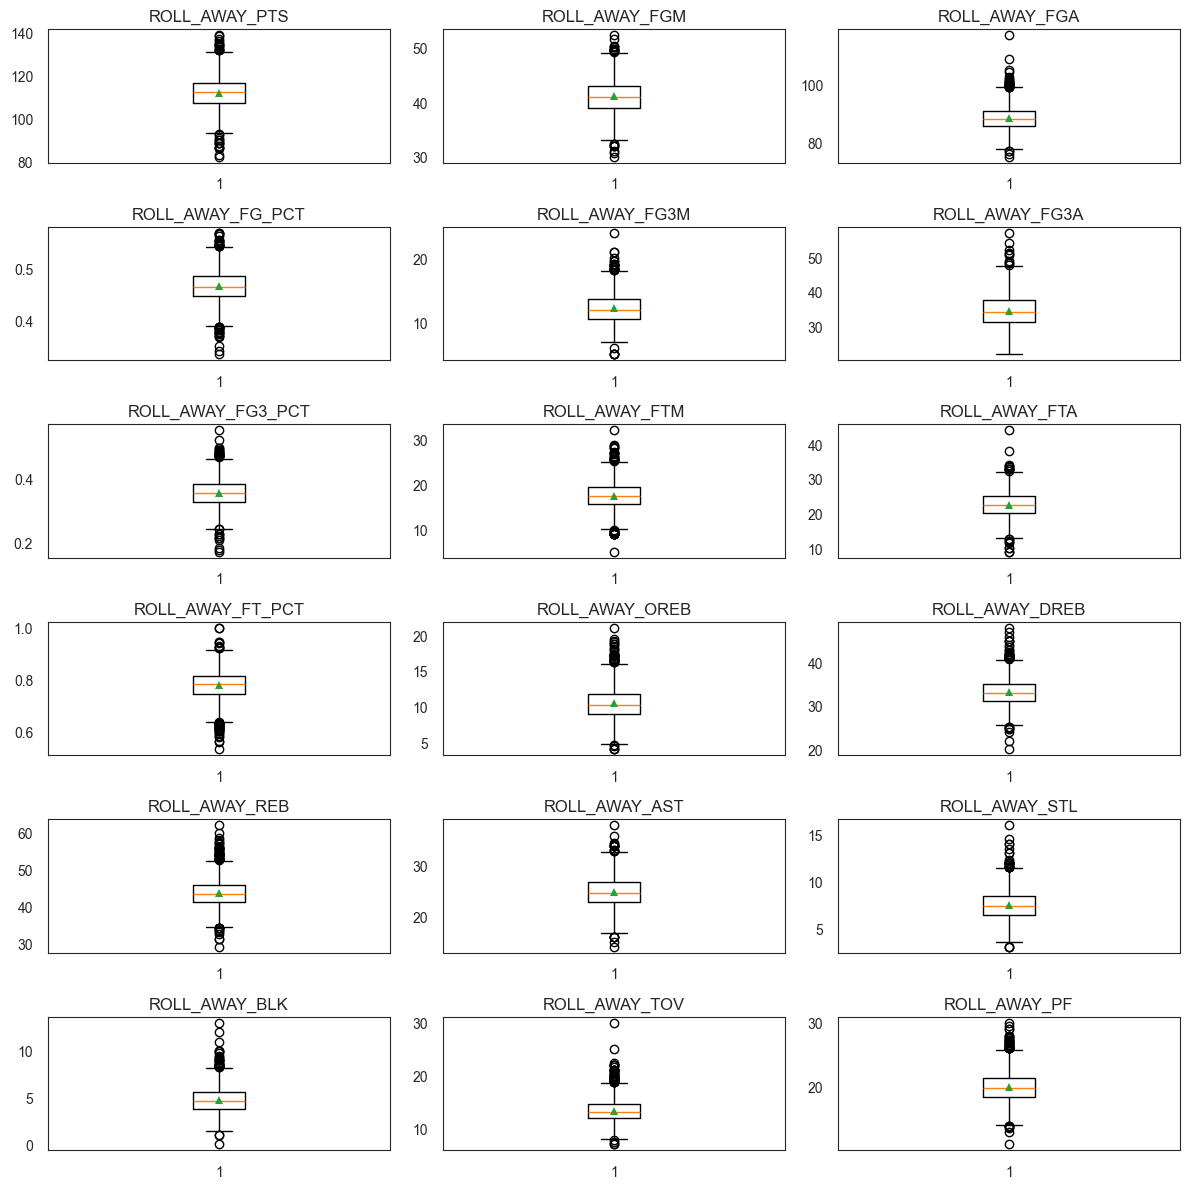

In [104]:
fig, axs = plt.subplots(6, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot(filtered_df[away_cols[i]],
               showmeans = True) 
    ax.set_title(away_cols[i])

plt.tight_layout()
plt.show()

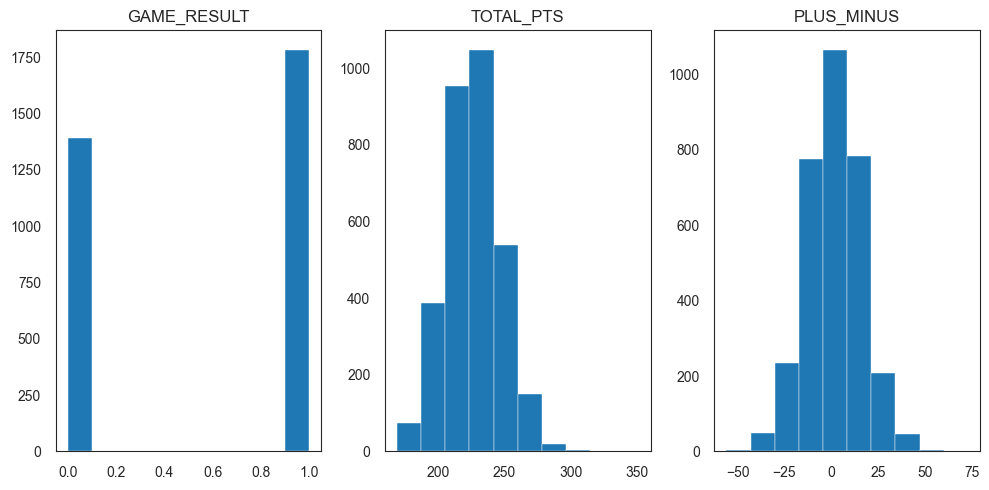

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

for i, ax in enumerate(axs.flatten()):
    ax.hist(team_bs_matchups_roll_df[res_cols[i]]) 
    ax.set_title(res_cols[i])

plt.tight_layout()
plt.show()


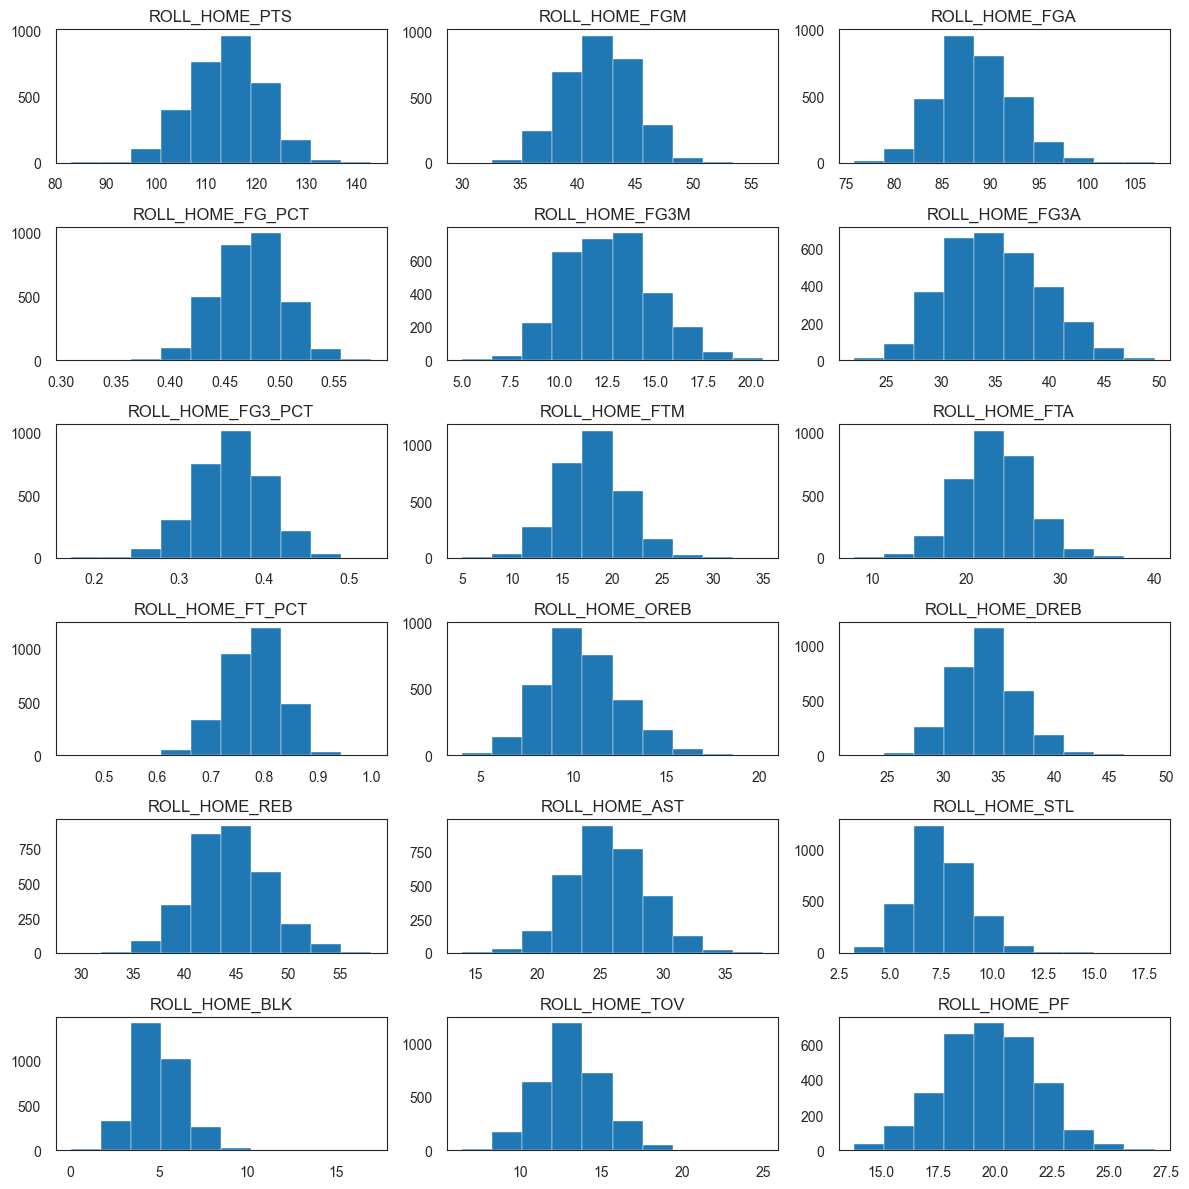

In [110]:
fig, axs = plt.subplots(6, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.hist(filtered_df[home_cols[i]]) 
    ax.set_title(home_cols[i])

plt.tight_layout()
plt.show()

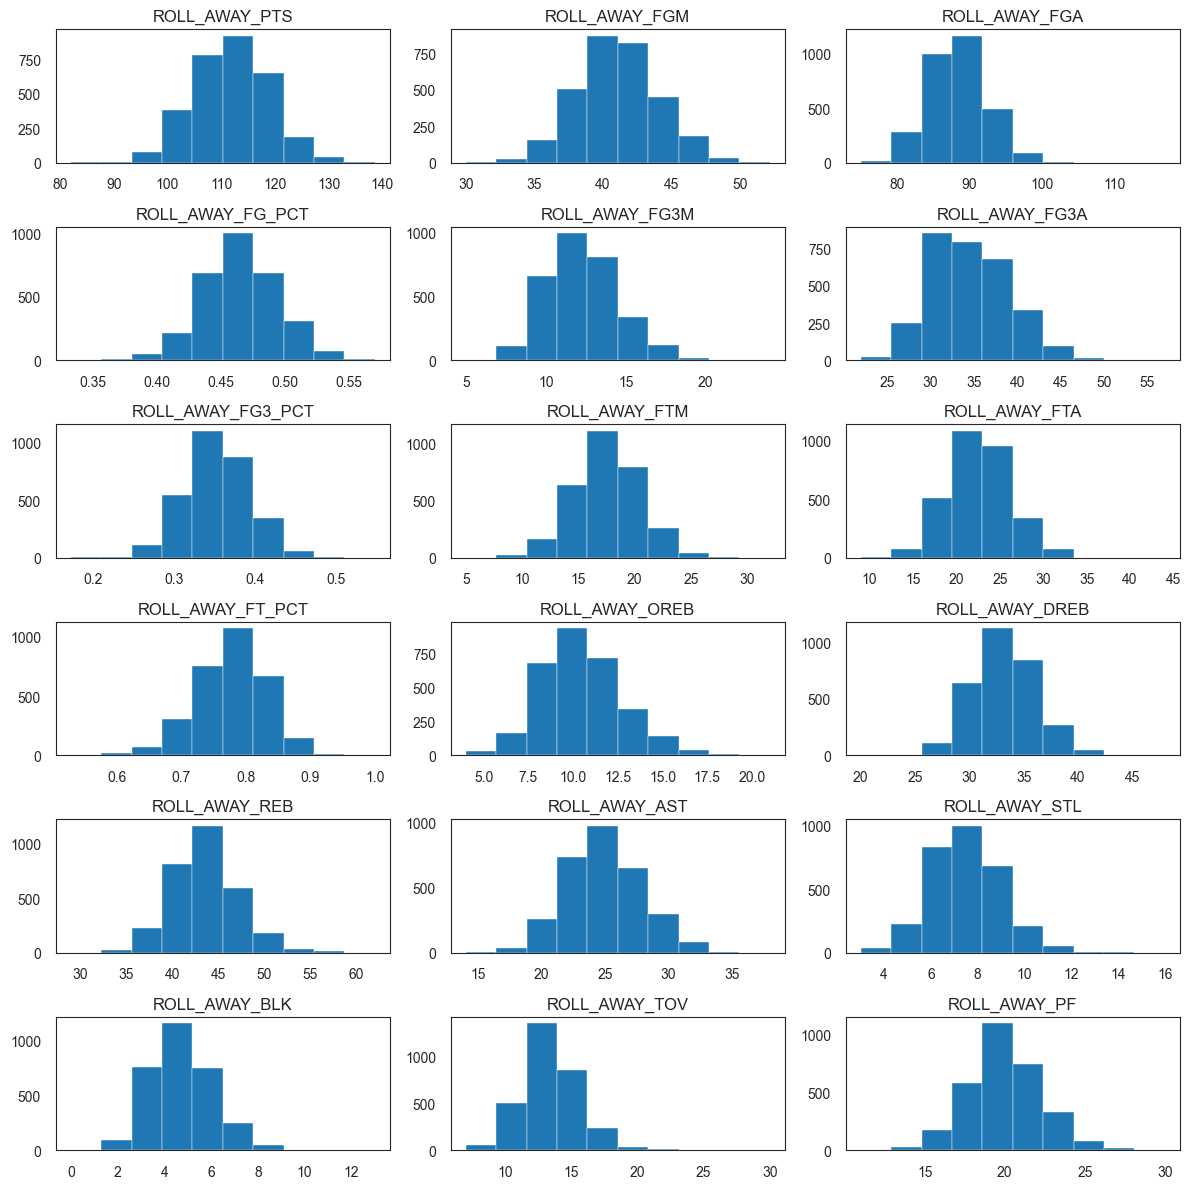

In [111]:
fig, axs = plt.subplots(6, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.hist(filtered_df[away_cols[i]]) 
    ax.set_title(away_cols[i])

plt.tight_layout()
plt.show()

In [114]:
import seaborn as sns

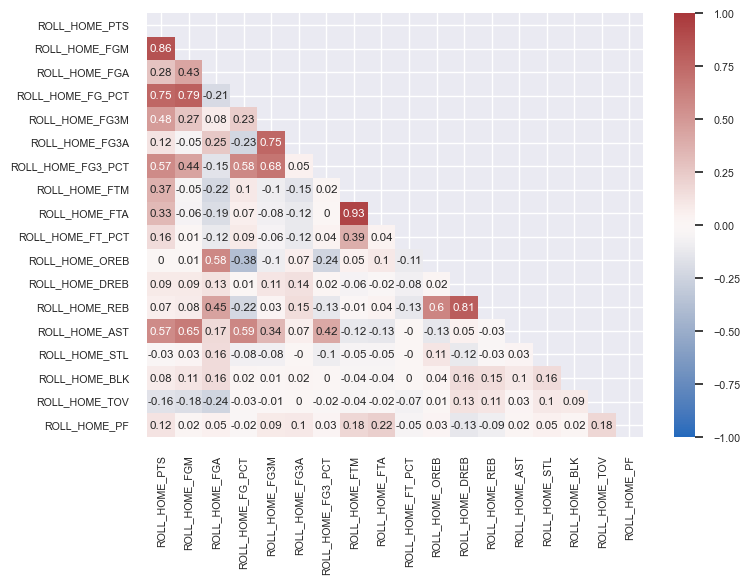

<Figure size 1600x1600 with 0 Axes>

In [163]:
matrix = team_bs_matchups_roll_df[home_cols].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(font_scale=0.7)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.figure(figsize=(20, 20), dpi=80)
plt.show()

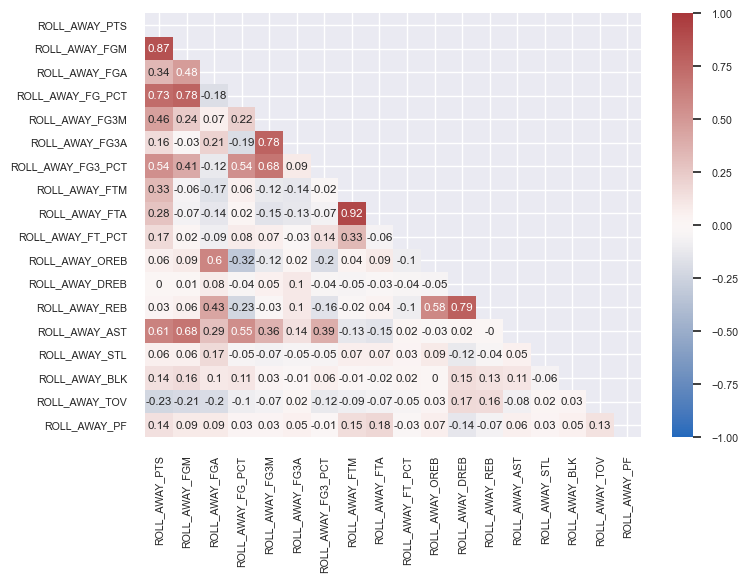

<Figure size 1600x1600 with 0 Axes>

In [164]:
matrix = team_bs_matchups_roll_df[away_cols].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(font_scale=0.7)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.figure(figsize=(20, 20), dpi=80)
plt.rcParams.update({'font.size': 10})
plt.show()